Import Libraries

In [3]:
pip install geopandas

     |████████████████████████████████| 931kB 8.6MB/s 
     |████████████████████████████████| 14.7MB 285kB/s 
     |████████████████████████████████| 10.9MB 44.2MB/s 


In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import geopandas as gpd
from prettytable import PrettyTable

Let's Scrap the Data

In [7]:
url = 'https://www.mohfw.gov.in/'# make a GET request to fetch the raw HTML content(Ministry of Health and Family Welfare Government of India)
web_content = requests.get(url).content# parse the html content
soup = BeautifulSoup(web_content, "html.parser")# remove any newlines and extra spaces from left and right
extract_contents = lambda row: [x.text.replace('\n', '') for x in row]# find all table rows and data cells within
stats = [] 
all_rows = soup.find_all('tr')
for row in all_rows:
    stat = extract_contents(row.find_all('td')) # notice that the data that we require is now a list of length 5
    if len(stat) == 5:
        stats.append(stat)#now convert the data into a pandas dataframe for further processingnew_cols = ["Sr.No", "States/UT","Confirmed","Recovered","Deceased"]

new_cols = ["Sr.No", "States/UT","Confirmed","Recovered","Deceased"]
state_data = pd.DataFrame(data = stats, columns = new_cols)
state_data.head()

# Data is scrapped on 27-05-2020

,Sr.No,States/UT,Confirmed,Recovered,Deceased
0,1,Andaman and Nicobar Islands,33,33,0
1,2,Andhra Pradesh,3171,2009,57
2,3,Arunachal Pradesh,2,1,0
3,4,Assam,616,62,4
4,5,Bihar,2983,900,13


In [8]:
state_data.shape

(37, 5)

scraped data columns are actually of ‘string’ datatype. We need to convert them into ‘int’ datatype.

In [0]:
state_data['Confirmed'] = pd.to_numeric(state_data['Confirmed'])

state_data['Recovered'] = pd.to_numeric(state_data['Recovered'])
state_data['Deceased'] =  pd.to_numeric(state_data['Deceased'])

Now we will use PrettyTable

In [35]:
table = PrettyTable()
table.field_names = (new_cols)
for i in stats:
    table.add_row(i)
table.add_row(["","Total", 
               sum(state_data['Confirmed']), 
               sum(state_data['Recovered']), 
               sum(state_data['Deceased'])])
               
print(table)

+-------+----------------------------------+-----------+-----------+----------+
| Sr.No |            States/UT             | Confirmed | Recovered | Deceased |
+-------+----------------------------------+-----------+-----------+----------+
|   1   |   Andaman and Nicobar Islands    |     33    |     33    |    0     |
|   2   |          Andhra Pradesh          |    3171   |    2009   |    57    |
|   3   |        Arunachal Pradesh         |     2     |     1     |    0     |
|   4   |              Assam               |    616    |     62    |    4     |
|   5   |              Bihar               |    2983   |    900    |    13    |
|   6   |            Chandigarh            |    266    |    187    |    4     |
|   7   |           Chhattisgarh           |    361    |     79    |    0     |
|   8   |        Dadar Nagar Haveli        |     2     |     0     |    0     |
|   9   |              Delhi               |   14465   |    7223   |   288    |
|   10  |               Goa             

Let' start Visualization

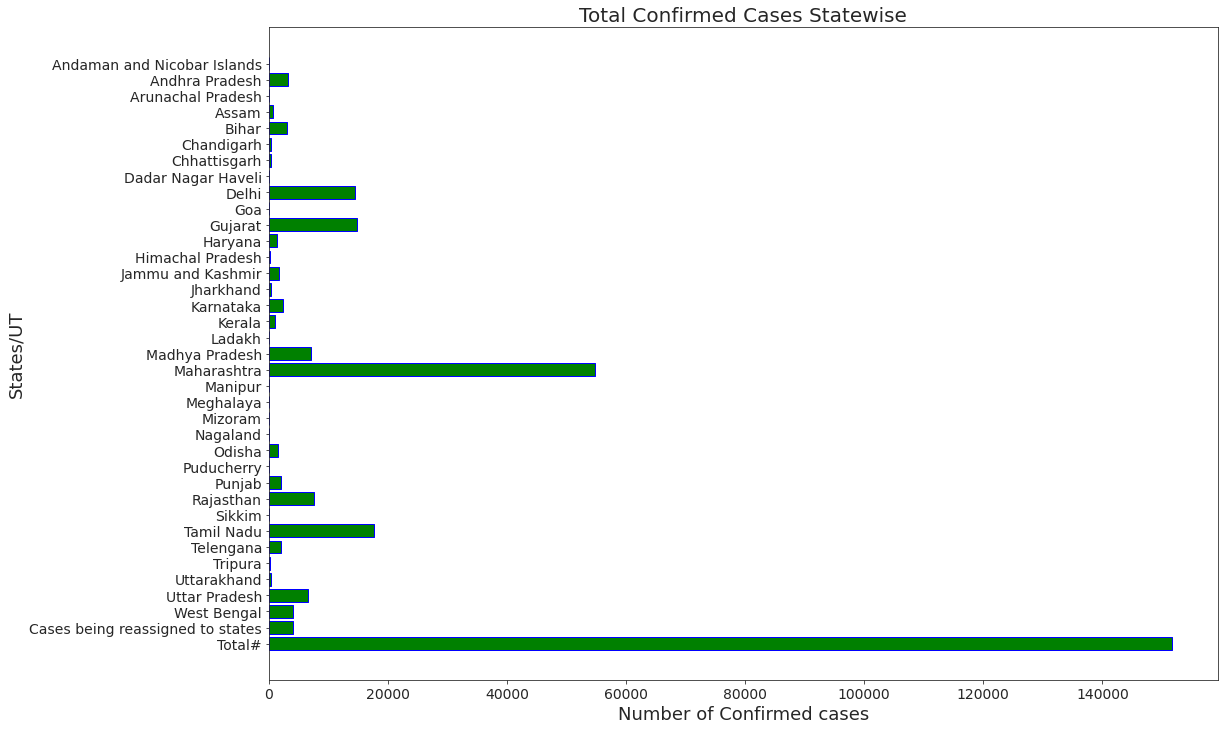

In [21]:
sns.set_style("ticks")
# plt.rcParams['axes.facecolor'] = 'black'
plt.figure(figsize = (17,12))
plt.barh(state_data["States/UT"], state_data["Confirmed"].map(int),
         align = 'center', color = 'green', edgecolor = 'blue')
plt.xlabel('Number of Confirmed cases', fontsize = 18)
plt.ylabel('States/UT', fontsize = 18)
plt.gca().invert_yaxis() #to maintain the order

plt.xticks(fontsize = 14) 
plt.yticks(fontsize = 14)
plt.title('Total Confirmed Cases Statewise', fontsize = 20)
plt.show() 

Donut chart for analysis of all India Cases

In [0]:
state_data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

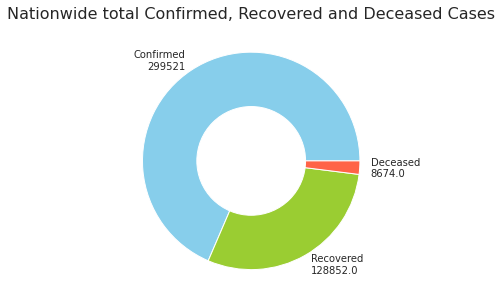

In [27]:
# donut chart representing nationwide total confirmed, cured and deceased cases
group_size = [sum(state_data['Confirmed']), 
              sum(state_data['Recovered']), 
              sum(state_data['Deceased'])]

group_labels = ['Confirmed\n' + str(sum(state_data['Confirmed'])), 
                'Recovered\n' + str(sum(state_data['Recovered'])), 
                'Deceased\n'  + str(sum(state_data['Deceased']))]
custom_colors = ['skyblue','yellowgreen','tomato']

plt.figure(figsize = (5,5))
plt.pie(group_size, labels = group_labels, colors = custom_colors)
central_circle = plt.Circle((0,0), 0.5, color = 'white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size = 12) 
plt.title('Nationwide total Confirmed, Recovered and Deceased Cases', fontsize = 16)
plt.show()


Let's plot Pie chart with Plotly to see a Confirmed cases ratio

After seen analysis, we can say that recovered ratio is more than death ratio. So it is good point for us

In [28]:
import plotly.express as px
fig = px.pie(state_data, values = 'Confirmed',names='States/UT', height=600)
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.update_layout(
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    ))

fig.show()

We can see Maharashtra have many number of cases

Let's see for Recovered cases ratio

In [29]:
fig = px.pie(state_data, values = 'Deceased',names='States/UT', height=600)
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.update_layout(
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    ))

fig.show()